In [4]:
import turicreate as tc

In [15]:
sales = tc.SFrame('home_data/')

In [50]:
sales.num_rows()


21613

In [17]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [19]:
#Used for scatter plot  tc.show(x ,y)
tc.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [21]:
#Splitting the date into trainting and test sets

training_set , test_set = sales.random_split(.8 , seed=0)

In [23]:
#Simple Regression Model based on SQ feet Vs Price

sqft_model = tc.linear_regression.create(training_set , target='price' , features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.022672     | 4356724.187452     | 3267673.399366       | 262345.182717                   | 274093.388789                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [24]:
#Evaluating the MODEL with Test SET

print ( sqft_model.evaluate(test_set))

{'rmse': 255191.39609586907, 'max_error': 4149374.4659357667}


In [26]:
!pip3 install matplotlib

     |████████████████████████████████| 13.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 1.4 MB/s eta 0:00:01


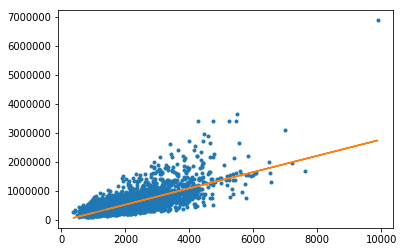

In [28]:
# Using Matplotlib to VISUALISE our MODEL

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(test_set['sqft_living'] , test_set['price'] ,'.', 
         test_set['sqft_living'] , sqft_model.predict(test_set) , '-')

In [29]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-46625.046584494645,5057.3658970325805
sqft_living,None,281.3195733719644,2.2241171622301703


In [32]:
#Exploring Other FEATURES

myFeatures =['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
sales[myFeatures].show()

Materializing SFrame

In [33]:
#Plotting ZIPCODE vs PRICE
tc.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [59]:
#Training a LR model with multiple features

my_features_model = tc.linear_regression.create(training_set , target='price', features=myFeatures  )

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.067327     | 4091341.785945     | 2163208.033943       | 188991.206794                   | 193858.321076                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [39]:
#Evaluating and comparing BOTH  the MODELS with Test SET

print ( sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'rmse': 255191.39609586907, 'max_error': 4149374.4659357667}
{'rmse': 180419.69592976393, 'max_error': 3154481.485246133}


In [40]:
#Applying learned models to make predictions

house1 = sales[sales['id']== '5309101200']

In [41]:
house1


Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [42]:
print(house1['price'])
print(sqft_model.predict(house1))
print(my_features_model.predict(house1))

[620000.0, ... ]
[628541.9295082199]
[728738.8466743891]


In [43]:
house2 = sales[sales['id']=='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [45]:
print(house2['price'])
print(sqft_model.predict(house2))
print(my_features_model.predict(house2))

[2200000.0, ... ]
[1258697.77386142]
[1232715.683908087]


In [58]:
zipcode=sales[]
zipcode_data['price'].mean()

2160606.5999999996

In [51]:
selected_houses = sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]
selected_houses.num_rows()

9221

In [52]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [60]:
advanced_model = tc.linear_regression.create(training_set , target='price' , features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.037464     | 4330525.723858     | 1330529.048774       | 163872.390575                   | 131714.238732                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [61]:
print(my_features_model.evaluate(test_set))
print(advanced_model.evaluate(test_set))


{'rmse': 180451.16713428567, 'max_error': 3153089.8048520405}
{'rmse': 155285.6568965254, 'max_error': 3155353.3015599325}


In [57]:
print(25169.4150384)

25169.4150384
